# NB 27. How well can non-DL classifiers separate the classes?

In [2]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from NegativeClassOptimization import utils, config, preprocessing, visualisations

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
# Apply linear classification and decision tree classification on the data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# df_p_train = pd.read_csv("../data/MiniAbsolut/3VRL/high_train_15000.tsv", sep='\t')
# df_p_test = pd.read_csv("../data/MiniAbsolut/3VRL/high_test_5000.tsv", sep='\t')

# df_n_train = pd.read_csv("../data/MiniAbsolut/1NSN/high_train_15000.tsv", sep='\t')
# df_n_test = pd.read_csv("../data/MiniAbsolut/1NSN/high_test_5000.tsv", sep='\t')

# df_train = pd.concat([df_p_train, df_n_train])
# df_test = pd.concat([df_p_test, df_n_test])

# (train_data, test_data, train_loader, test_loader) = preprocessing.preprocess_data_for_pytorch_binary(
#     df_train,
#     df_test,
#     ag_pos=["3VRL"],
#     scale_X=False,
# )

In [5]:
df_p_train = pd.read_csv("../data/MiniAbsolut/3VRL/high_train_15000.tsv", sep='\t')
df_p_train["Antigen"] = "3VRL_high"
df_p_test = pd.read_csv("../data/MiniAbsolut/3VRL/high_test_5000.tsv", sep='\t')
df_p_test["Antigen"] = "3VRL_high"

df_n_train = pd.read_csv("../data/MiniAbsolut/3VRL/looserX_train_15000.tsv", sep='\t')
df_n_train["Antigen"] = "3VRL_looser"
df_n_test = pd.read_csv("../data/MiniAbsolut/3VRL/looserX_test_5000.tsv", sep='\t')
df_n_test["Antigen"] = "3VRL_looser"

df_train = pd.concat([df_p_train, df_n_train])
df_test = pd.concat([df_p_test, df_n_test])

(train_data, test_data, train_loader, test_loader) = preprocessing.preprocess_data_for_pytorch_binary(
    df_train,
    df_test,
    ag_pos=["3VRL_high"],
    scale_X=False,
)

/data/sources/eugen/negative-class-optimization/src/NegativeClassOptimization/NegativeClassOptimization/preprocessing.py:284: UserWarning: Not scaling X.
  warnings.warn("Not scaling X.")


In [6]:
X_train = train_loader.dataset.df["X"].values
X_train = np.stack(X_train)
y_train = train_loader.dataset.df["y"].values

X_test = test_loader.dataset.df["X"].values
X_test = np.stack(X_test)
y_test = test_loader.dataset.df["y"].values


# Train logistic regression classifier
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Get weights with statistical significance
w = clf.coef_

# Evaluate performance on test set with accuracy
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)
acc = sklearn.metrics.accuracy_score(y_test, y_pred_test)

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
print(acc_train, acc)

0.8887666666666667 0.8912


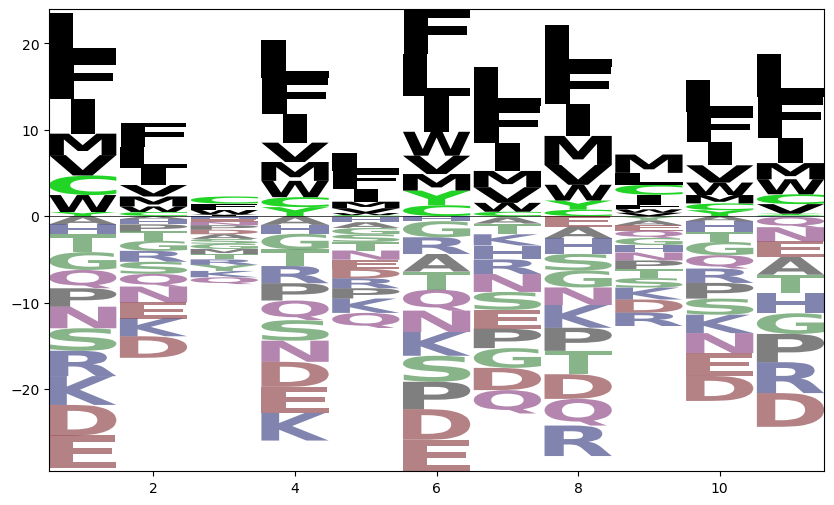

In [8]:
df_w = pd.DataFrame(w.reshape((-1, 20)), columns=config.AMINOACID_ALPHABET, index=range(1, 12))
visualisations.plot_logo(
    df_w,
)

In [9]:
pd.Series(w.flatten()).describe()

count    220.000000
mean      -0.279360
std        2.152621
min       -3.905187
25%       -1.944934
50%       -0.747413
75%        1.134263
max        5.175592
dtype: float64

<AxesSubplot: >

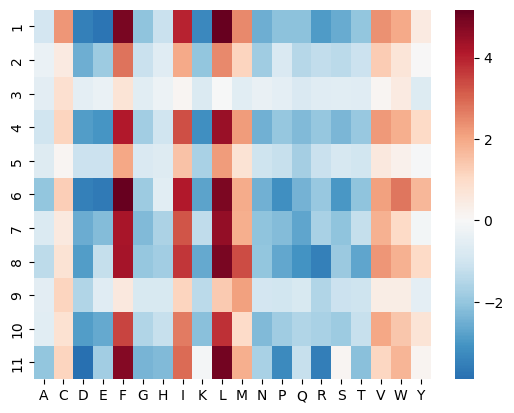

In [10]:
# Heatmap with divergent colormap
sns.heatmap(df_w, cmap="RdBu_r", center=0)

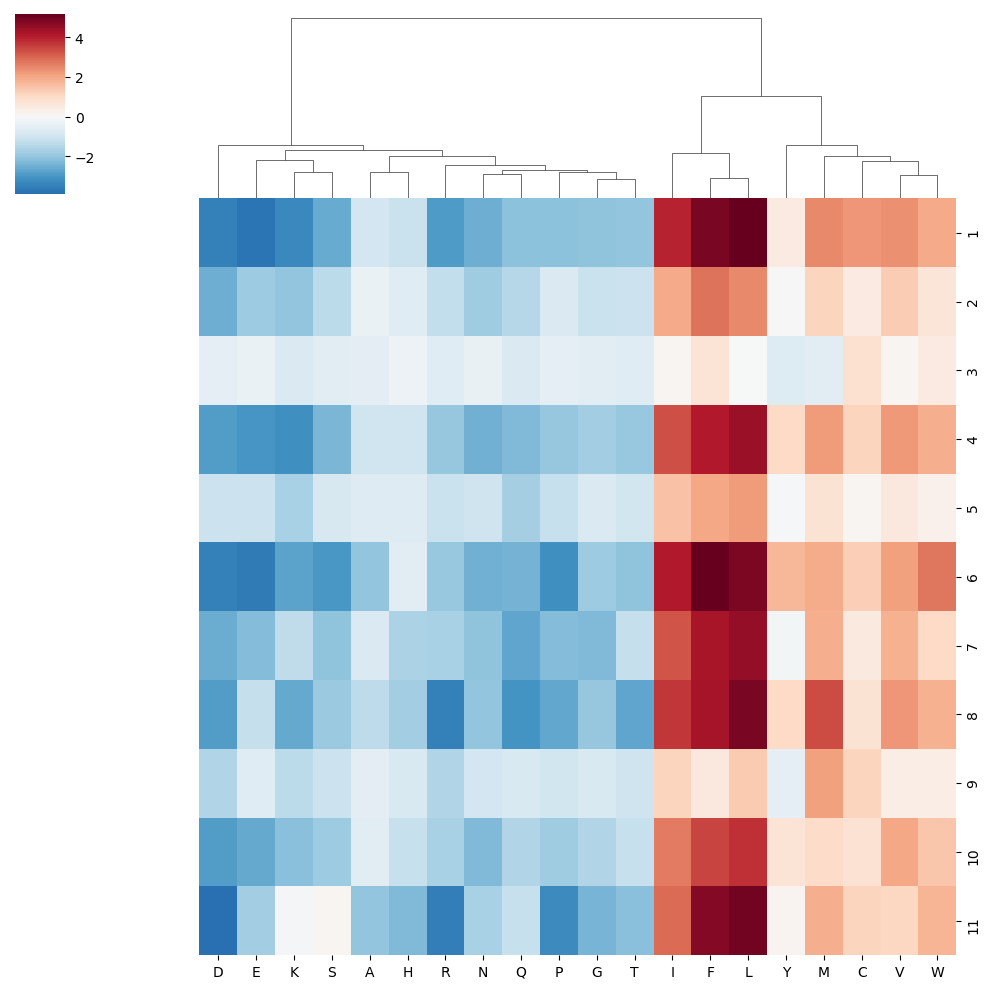

In [11]:
sns.clustermap(
    df_w,
    row_cluster=False,
    cmap="RdBu_r", 
    center=0)

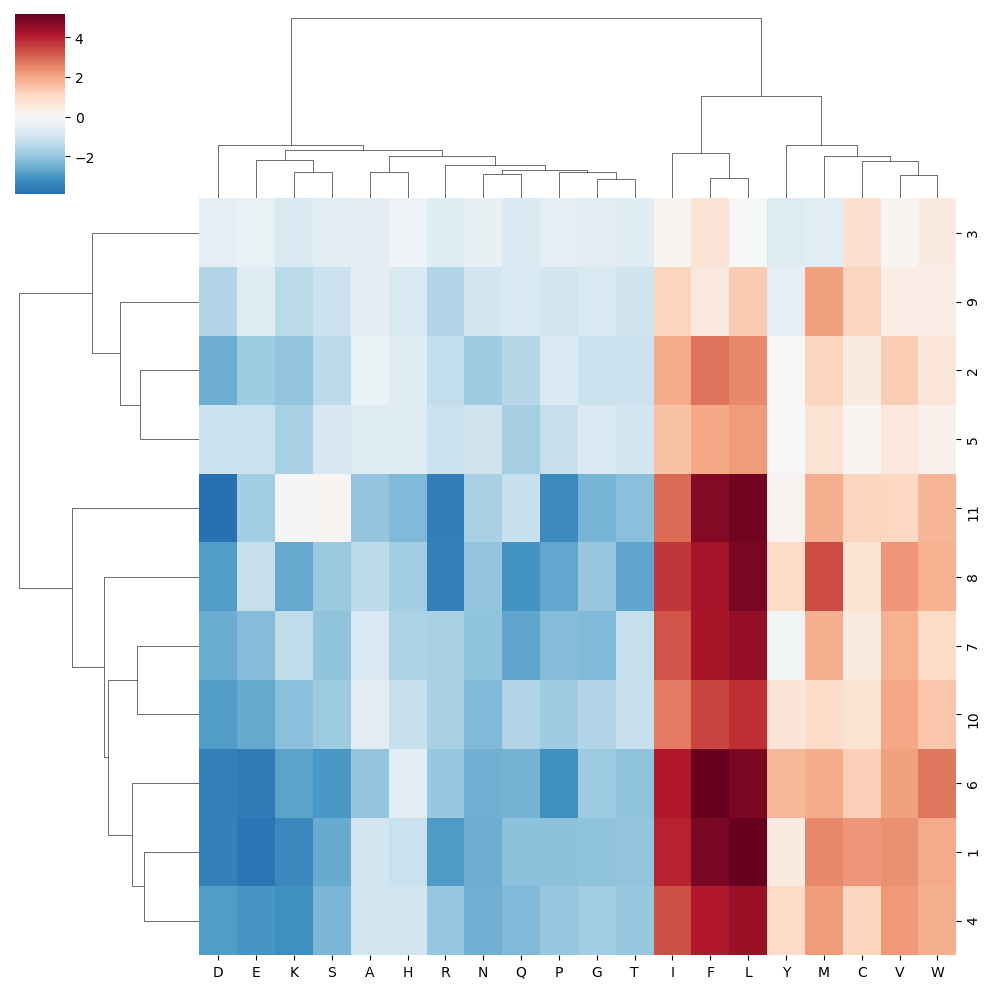

In [12]:
sns.clustermap(
    df_w,
    cmap="RdBu_r", 
    center=0)